# How does the efficiency of physical activity (in terms of calorie burn per step) vary by individual characteristics and device type?

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

### Loading the dataset

In [2]:
data = pd.read_csv('Devices.csv')
data.head()

,Unnamed: 0,Heart,Calories,Steps,Distance,Age,Gender,Weight,Height,Activity,Device
0,0,55,2.70432,8.0,0.003666,35,M,179.0,5.6,1.Sedentary,Fitbit
1,1,54,2.92968,13.0,0.006027,35,M,179.0,5.6,1.Sedentary,Fitbit
2,2,59,2.70432,9.0,0.004163,35,M,179.0,5.6,1.Sedentary,Fitbit
3,3,58,2.70432,11.0,0.005095,35,M,179.0,5.6,1.Sedentary,Fitbit
4,4,58,1.12680,0.0,0.000000,35,M,179.0,5.6,1.Sedentary,Fitbit


In [3]:
data = data.drop(data.columns[0], axis=1)
data.head()

,Heart,Calories,Steps,Distance,Age,Gender,Weight,Height,Activity,Device
0,55,2.70432,8.0,0.003666,35,M,179.0,5.6,1.Sedentary,Fitbit
1,54,2.92968,13.0,0.006027,35,M,179.0,5.6,1.Sedentary,Fitbit
2,59,2.70432,9.0,0.004163,35,M,179.0,5.6,1.Sedentary,Fitbit
3,58,2.70432,11.0,0.005095,35,M,179.0,5.6,1.Sedentary,Fitbit
4,58,1.12680,0.0,0.000000,35,M,179.0,5.6,1.Sedentary,Fitbit


### Creating 'Calories per Step'

In [4]:
data['Calories_per_Step'] = data['Calories'] / data['Steps'].replace(0, np.nan)
data['Calories_per_Step'].fillna(0, inplace=True)  # Handling divisions by zero
data.head()

,Heart,Calories,Steps,Distance,Age,Gender,Weight,Height,Activity,Device,Calories_per_Step
0,55,2.70432,8.0,0.003666,35,M,179.0,5.6,1.Sedentary,Fitbit,0.338040
1,54,2.92968,13.0,0.006027,35,M,179.0,5.6,1.Sedentary,Fitbit,0.225360
2,59,2.70432,9.0,0.004163,35,M,179.0,5.6,1.Sedentary,Fitbit,0.300480
3,58,2.70432,11.0,0.005095,35,M,179.0,5.6,1.Sedentary,Fitbit,0.245847
4,58,1.12680,0.0,0.000000,35,M,179.0,5.6,1.Sedentary,Fitbit,0.000000


### Defining categorical and numeric features

In [5]:
categorical_features = ['Gender', 'Device']
numeric_features = ['Age', 'Weight', 'Height', 'Heart', 'Distance']

### Creating a ColumnTransformer to apply transformations to the respective features

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

### Defining the model using RidgeCV or LassoCV

In [7]:
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
lasso_model = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5)

### Creating a pipeline that first transforms the data then fits the model

In [8]:
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ridge_model)])

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', lasso_model)])

### Splitting data into training and testing sets

In [9]:
X = data.drop(columns=['Calories', 'Calories_per_Step', 'Steps'])  # Exclude target variable and original features used to create the new feature
y = data['Calories_per_Step']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting the Ridge and Lasso models

In [10]:
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Weight', 'Height',
                                                   'Heart', 'Distance']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Device'])])),
                ('regressor',
                 LassoCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
                         cv=5))])

### Predicting and calculating the mean squared error for each model

In [11]:
y_pred_ridge = ridge_pipeline.predict(X_test)
y_pred_lasso = lasso_pipeline.predict(X_test)

print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

Ridge Regression MSE: 0.025371075916977296
Lasso Regression MSE: 0.02537662074589587


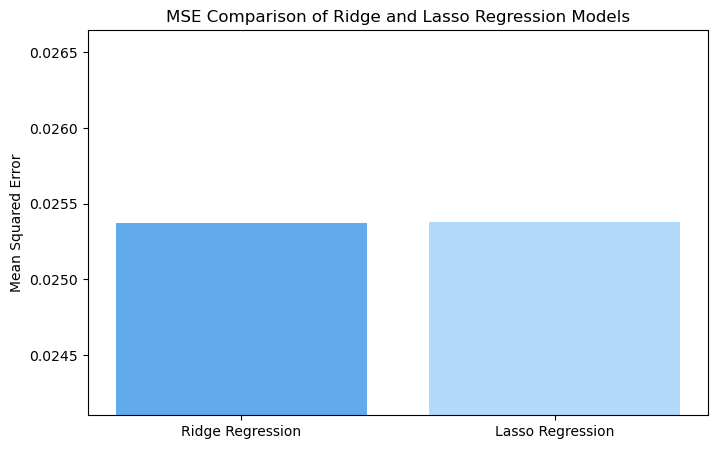

In [12]:
import matplotlib.pyplot as plt

# Assume MSE values are already defined, use example values if not specified
ridge_mse = 0.025371075916977296
lasso_mse = 0.02537662074589587
models = ['Ridge Regression', 'Lasso Regression']
mse_values = [ridge_mse, lasso_mse]

# Create a bar chart to visualize the MSE for each model
plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=['#1E88E5', '#90CAF9'], alpha=0.7)  # Using specific colors for visual distinction
plt.title('MSE Comparison of Ridge and Lasso Regression Models')
plt.ylabel('Mean Squared Error')
plt.ylim(min(mse_values) * 0.95, max(mse_values) * 1.05)  # Add some margin for better visualization
plt.show()



These small values suggest that both models perform similarly and adequately in predicting the efficiency of physical activity (calories burned per step), with a low average squared error across predictions.

### Printing the coefficients from both models

In [13]:
print("Ridge coefficients:", ridge_pipeline.named_steps['regressor'].coef_)
print("Lasso coefficients:", lasso_pipeline.named_steps['regressor'].coef_)

Ridge coefficients: [ 0.00130378 -0.01256043 -0.00165031  0.01629796 -0.00879577 -0.00574314
  0.00574314 -0.03710797  0.03710797]
Lasso coefficients: [ 9.57348613e-04 -1.24340399e-02 -1.61781270e-03  1.60979611e-02
 -8.54354645e-03 -1.19676940e-02  1.87737527e-16 -7.71234763e-02
  4.49336781e-15]


### Plotting the coefficients from both models

In [14]:
# Function to create an interactive plot of model coefficients using Plotly with the Portland color scheme
def plot_coefficients_plotly(coefficients, model_name, feature_names):
    # Creating the figure
    fig = go.Figure()
    
    # Adding the bar chart
    fig.add_trace(
        go.Bar(
            x=feature_names,
            y=coefficients,
            marker=dict(
                color=coefficients,  # Set color equal to the values of the coefficients
                cmin=min(coefficients),  # Minimum value of color scale
                cmax=max(coefficients),  # Maximum value of color scale
                colorscale='Portland'  # Use Portland color scale
            )
        )
    )
    
    # Updating the layout
    fig.update_layout(
        title=f'{model_name} Model Coefficients',
        xaxis_title='Features',
        yaxis_title='Coefficient Value',
        xaxis_tickangle=-45,
        template='plotly_white',  # using a light background template
        plot_bgcolor='rgba(0,0,0,0)',  # making background transparent
        paper_bgcolor='rgba(0,0,0,0)'  # making paper background transparent
    )
    
    # Show the plot
    fig.show()

# Get feature names from the preprocessor in the pipeline
feature_names = (ridge_pipeline.named_steps['preprocessor']
                 .transformers_[0][1]
                 .get_feature_names_out(numeric_features).tolist() +
                 ridge_pipeline.named_steps['preprocessor']
                 .transformers_[1][1]
                 .get_feature_names_out(categorical_features).tolist())

# Plotting Ridge and Lasso coefficients with the Portland color scheme
plot_coefficients_plotly(ridge_pipeline.named_steps['regressor'].coef_, 'Ridge', feature_names)
plot_coefficients_plotly(lasso_pipeline.named_steps['regressor'].coef_, 'Lasso', feature_names)


**Numeric Features (Age, Weight, Height, Heart Rate, Distance):**

* **Age:** The coefficients for age are positive in both models, suggesting that older individuals may have a slightly higher efficiency in burning calories per step.

* **Weight and Height:** Weight shows a negative coefficient, indicating that heavier individuals might have lower efficiency, whereas height's impact is less clear due to mixed signs across models.

* **Heart Rate:** Positive coefficients for heart rate imply that higher heart rates (possibly indicating more intense activity) are associated with greater efficiency in calorie burning per step.

* **Distance:** Shows a negative effect in both models, suggesting that activities that cover more distance may not necessarily be more efficient in terms of calories burned per step, possibly due to the nature of the activity being less intense over longer distances.


**Categorical Features (Gender, Device):**

* **Gender:** In the Ridge model, males (Gender_M) have a negative coefficient, suggesting lower efficiency compared to females. In the Lasso model, gender seems to be less influential due to the near-zero coefficient.

* **Device Type:** The coefficient for Fitbit is negative in Ridge and almost zero in Lasso, suggesting that using a Fitbit might be less efficient compared to an Apple Watch in terms of calorie burn per step. However, this could also be influenced by how the model handles sparse data or less variation in device type.